
> **Binance Spot and Futures Testnet**

After developing your functions, you can utilize the [Binance Spot Testnet](https://testnet.binance.vision/) and [Futures Testnet](https://testnet.binancefuture.com/) to test your use cases for free.

> **How to Test Functions on the Spot Testnet?**

Log in to the Binance Spot Test Network website by clicking [Log In with GitHub](https://testnet.binance.vision/).

> If you don’t have any API Keys, click `[Generate HMAC_SHA256 Key] `

and follow the instructions to create one. Please keep your Secret Key secure as it will not be shown again. Do not share this key with anyone.

> If you forget your Secret Key, you will need to click `[Revoke]`

to delete the API and create a new one.

In [2]:
!pip install python-binance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.7/113.7 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 50.7 MB/s eta 0:00:00


In [8]:
from binance.client import Client

# Initialize the Binance API
api_key = 'your_api_key'
api_secret = 'your_api_secret'

client = Client(api_key, api_secret, testnet=True)

# Fetch historical kline (candlestick) data
bars = client.get_historical_klines("BTCUSDT", Client.KLINE_INTERVAL_1MINUTE, "2 hours ago UTC")

# Print the fetched data
for bar in bars:
    print(bar)

[1736683260000, '94348.66000000', '94348.66000000', '94259.23000000', '94259.23000000', '0.09211000', 1736683319999, '8682.67149340', 44, '0.00190000', '179.26245400', '0']
[1736683320000, '94219.36000000', '94348.66000000', '94219.30000000', '94219.30000000', '0.13030000', 1736683379999, '12278.00798350', 42, '0.02718000', '2561.90102820', '0']
[1736683380000, '94219.30000000', '94227.68000000', '94219.30000000', '94227.67000000', '0.01869000', 1736683439999, '1761.04478590', 10, '0.00801000', '754.76034420', '0']
[1736683440000, '94227.69000000', '94227.69000000', '94227.01000000', '94227.01000000', '0.03160000', 1736683499999, '2977.58820420', 18, '0.00649000', '611.53765690', '0']
[1736683500000, '94227.68000000', '94227.94000000', '94209.44000000', '94227.67000000', '0.09008000', 1736683559999, '8487.36598820', 49, '0.04608000', '4341.96004000', '0']
[1736683560000, '94227.68000000', '94227.88000000', '94227.39000000', '94227.39000000', '0.03559000', 1736683619999, '3353.56051790'

`pd.to_datetime(df['Open time'], unit='ms')`: Converts the timestamp from milliseconds to a readable datetime format.

`df.set_index('Open time', inplace=True)`: Sets the 'Open time' column as the index.

`df.iloc[:, :5]`: Selects only the first five columns: Open, High, Low, Close, and Volume.

In [9]:
import pandas as pd

# Load result into a DataFrame
df = pd.DataFrame(bars)

# Set the column names
df.columns = [
    "Open time", "Open", "High", "Low", "Close", "Volume", "Close time",
    "Quote asset volume", "Number of trades", "Taker buy base asset volume",
    "Taker buy quote asset volume", "Ignore"
]

# Convert the timestamp into datetime objects
df['Open time'] = pd.to_datetime(df['Open time'], unit='ms')

# Set the Open time as the index of our DataFrame
df.set_index('Open time', inplace=True)

# Keep only the first 5 columns (Volume included)
df = df.iloc[:, :5]

print(df.head())


                               Open            High             Low  \
Open time                                                             
2025-01-12 12:01:00  94348.66000000  94348.66000000  94259.23000000   
2025-01-12 12:02:00  94219.36000000  94348.66000000  94219.30000000   
2025-01-12 12:03:00  94219.30000000  94227.68000000  94219.30000000   
2025-01-12 12:04:00  94227.69000000  94227.69000000  94227.01000000   
2025-01-12 12:05:00  94227.68000000  94227.94000000  94209.44000000   

                              Close      Volume  
Open time                                        
2025-01-12 12:01:00  94259.23000000  0.09211000  
2025-01-12 12:02:00  94219.30000000  0.13030000  
2025-01-12 12:03:00  94227.67000000  0.01869000  
2025-01-12 12:04:00  94227.01000000  0.03160000  
2025-01-12 12:05:00  94227.67000000  0.09008000  


Explanation:

`order_market_buy`: Places a market order to buy the specified quantity of BTC with USDT.

`get_open_orders`: Retrieves a list of the user's open orders for the specified symbol.

In [11]:
# Buy a little bit of bitcoin
order = client.order_market_buy(
    symbol='BTCUSDT',
    quantity=.001)
print(order)

{'symbol': 'BTCUSDT', 'orderId': 1218704, 'orderListId': -1, 'clientOrderId': 'x-HNA2TXFJ24b87b3262c87e44a3b5c3', 'transactTime': 1736690501530, 'price': '0.00000000', 'origQty': '0.00100000', 'executedQty': '0.00100000', 'origQuoteOrderQty': '0.00000000', 'cummulativeQuoteQty': '94.66575000', 'status': 'FILLED', 'timeInForce': 'GTC', 'type': 'MARKET', 'side': 'BUY', 'workingTime': 1736690501530, 'fills': [{'price': '94665.75000000', 'qty': '0.00100000', 'commission': '0.00000000', 'commissionAsset': 'BTC', 'tradeId': 382006}], 'selfTradePreventionMode': 'EXPIRE_MAKER'}


In [12]:
# Get a list of orders that are pending
open_orders = client.get_open_orders(symbol='BTCUSDT')
open_orders

[]

In [15]:
# Fetch a list of open orders for BTCUSDT
open_orders = client.get_open_orders(symbol='BTCUSDT')

if open_orders:
    print("Open Orders: ", open_orders)
else:
    print("No open orders.")


No open orders.


In [13]:
#Get a list of orders that we made previously
all_orders = client.get_all_orders(symbol='BTCUSDT')
print(all_orders)

[{'symbol': 'BTCUSDT', 'orderId': 1218704, 'orderListId': -1, 'clientOrderId': 'x-HNA2TXFJ24b87b3262c87e44a3b5c3', 'price': '0.00000000', 'origQty': '0.00100000', 'executedQty': '0.00100000', 'cummulativeQuoteQty': '94.66575000', 'status': 'FILLED', 'timeInForce': 'GTC', 'type': 'MARKET', 'side': 'BUY', 'stopPrice': '0.00000000', 'icebergQty': '0.00000000', 'time': 1736690501530, 'updateTime': 1736690501530, 'isWorking': True, 'workingTime': 1736690501530, 'origQuoteOrderQty': '0.00000000', 'selfTradePreventionMode': 'EXPIRE_MAKER'}]


In [14]:
import json

#Get account info
acct = client.get_account()

# Show the results in a formatted way
print(json.dumps(acct, indent=4, sort_keys=True))

{
    "accountType": "SPOT",
    "balances": [
        {
            "asset": "ETH",
            "free": "1.00000000",
            "locked": "0.00000000"
        },
        {
            "asset": "BTC",
            "free": "1.00100000",
            "locked": "0.00000000"
        },
        {
            "asset": "LTC",
            "free": "4.00000000",
            "locked": "0.00000000"
        },
        {
            "asset": "BNB",
            "free": "1.00000000",
            "locked": "0.00000000"
        },
        {
            "asset": "USDT",
            "free": "9905.33425000",
            "locked": "0.00000000"
        },
        {
            "asset": "TRX",
            "free": "1996.00000000",
            "locked": "0.00000000"
        },
        {
            "asset": "XRP",
            "free": "214.00000000",
            "locked": "0.00000000"
        },
        {
            "asset": "NEO",
            "free": "34.00000000",
            "locked": "0.00000000"
        },

`order_market_buy`: Places a market order to buy the specified quantity of BTC with USDT.

`get_open_orders`: Retrieves a list of open orders for the specified symbol.

`get_all_orders`: Fetches a list of all previous orders for BTCUSDT.

`get_account`: Retrieves the account information, formatted using the json library for better readability.

In [17]:
client = Client(api_key, api_secret, testnet=True)

# Place a market buy order to purchase 0.001 BTC
order = client.order_market_buy(
    symbol='BTCUSDT',
    quantity=0.001)
print("Order: ", order)

# Get a list of pending orders for BTCUSDT
open_orders = client.get_open_orders(symbol='BTCUSDT')
print("Open Orders: ", open_orders)

# Get a list of all previous orders for BTCUSDT
all_orders = client.get_all_orders(symbol='BTCUSDT')
print("All Orders: ", all_orders)

# Get account info
acct = client.get_account()

# Show the results in a formatted way
print("Account Info: ", json.dumps(acct, indent=4, sort_keys=True))

Order:  {'symbol': 'BTCUSDT', 'orderId': 1219603, 'orderListId': -1, 'clientOrderId': 'x-HNA2TXFJ39563854cb41948863e613', 'transactTime': 1736690761817, 'price': '0.00000000', 'origQty': '0.00100000', 'executedQty': '0.00100000', 'origQuoteOrderQty': '0.00000000', 'cummulativeQuoteQty': '94.68815000', 'status': 'FILLED', 'timeInForce': 'GTC', 'type': 'MARKET', 'side': 'BUY', 'workingTime': 1736690761817, 'fills': [{'price': '94688.15000000', 'qty': '0.00100000', 'commission': '0.00000000', 'commissionAsset': 'BTC', 'tradeId': 382301}], 'selfTradePreventionMode': 'EXPIRE_MAKER'}
Open Orders:  []
All Orders:  [{'symbol': 'BTCUSDT', 'orderId': 1218704, 'orderListId': -1, 'clientOrderId': 'x-HNA2TXFJ24b87b3262c87e44a3b5c3', 'price': '0.00000000', 'origQty': '0.00100000', 'executedQty': '0.00100000', 'cummulativeQuoteQty': '94.66575000', 'status': 'FILLED', 'timeInForce': 'GTC', 'type': 'MARKET', 'side': 'BUY', 'stopPrice': '0.00000000', 'icebergQty': '0.00000000', 'time': 1736690501530, 'u

The `MACD (Moving Average Convergence Divergence)` is a popular momentum indicator that helps identify trend reversals and can be very useful for your trading bot. Below is your code with some explanations:

Explanation:

`pd.to_numeric(df['Close'], errors='coerce')`: Converts the 'Close' column to numeric, setting non-convertible entries to NaN.

`df.dropna(inplace=True)`: Removes rows with NaN values to ensure consistency.

Function Usage: MACD calculation and plotting remain unchanged.

In [19]:
! pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218909 sha256=b9fb872ad573303f5da0dfc1521476829132f957ca7a4fdcd8cd8fd22b0ffbba
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


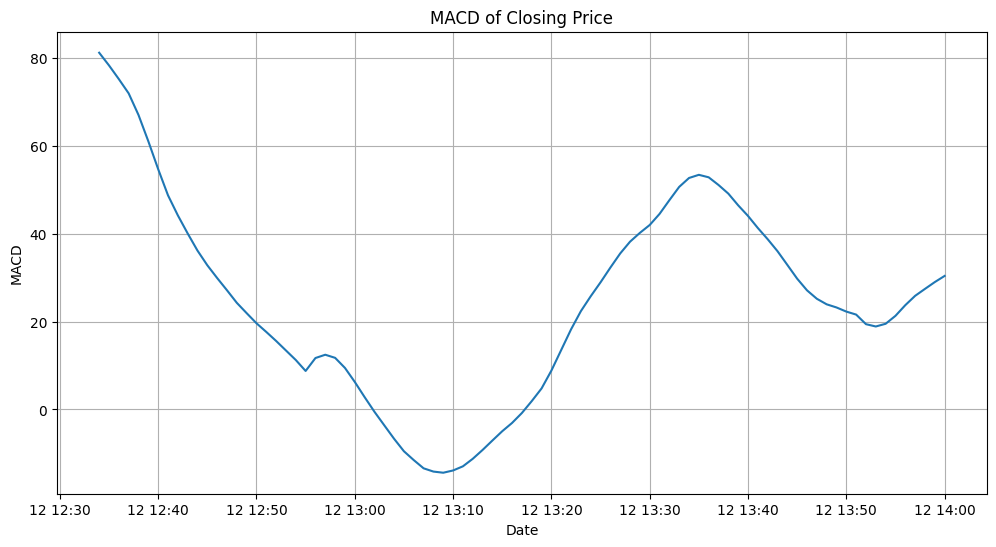

In [25]:
import pandas_ta as ta
import matplotlib.pyplot as plt

# Convert data to numeric, forcing errors to NaN (then drop them)
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

# Drop any rows with NaN values to prevent type issues
df.dropna(inplace=True)

# Function to calculate MACD
def get_macd(data, slow=26, fast=12, signal=9):
    macd = ta.macd(data, slow=slow, fast=fast, signal=signal)
    return macd.iloc[:,-1]

# Calculate MACD for the closing prices
macd = get_macd(df["Close"])

# Plot MACD
plt.figure(figsize=(12,6))
plt.plot(df.index, macd)
plt.title('MACD of Closing Price')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.grid(True)
plt.show()


`Wrapper Function`: This function wraps the previous script, fetching and processing 1-minute historical data.

`DataFrame Columns`: Consolidates the columns for readability.

`Numeric Conversion`: Ensures all data remains numeric to avoid type issues.

`Indicators`: Adds MACD and a 30-minute percentage change to the DataFrame.

In [26]:
# Get up-to-date 1-minute data from Binance and add the MACD and price changes
def get_bars(asset='ETH'):
    # Fetch historical 1-minute klines for the given asset
    bars = client.get_historical_klines(
        f"{asset}USDT", Client.KLINE_INTERVAL_1MINUTE, start_str="1 hour ago UTC")

    # Load the result into a DataFrame
    df = pd.DataFrame(bars)
    df.columns = [
        "Open time", "Open", "High", "Low", "Close", "Volume", "Close time",
        "Quote asset volume", "Number of trades", "Taker buy base asset volume",
        "Taker buy quote asset volume", "Ignore"]

    # Convert the timestamp into datetime objects
    df['Open time'] = pd.to_datetime(df['Open time'], unit='ms')

    # Set the Open time as the index of the DataFrame
    df.set_index('Open time', inplace=True)

    # Retain relevant columns
    df = df.iloc[:, :5]

    # Convert column data to numeric type
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Add trading indicators
    df['MACD'] = get_macd(df["Close"])
    df['Pct Change 30m'] = df['Close'].pct_change(30)

    return df

# Fetch and display data for BTC
btc_data = get_bars('BTC')
print(btc_data.head())


                         Open      High       Low     Close   Volume  MACD  \
Open time                                                                    
2025-01-12 13:13:00  94421.26  94426.29  94414.52  94414.52  0.19272   NaN   
2025-01-12 13:14:00  94414.52  94416.21  94410.93  94416.21  0.03411   NaN   
2025-01-12 13:15:00  94417.23  94434.73  94414.12  94414.71  0.27136   NaN   
2025-01-12 13:16:00  94414.69  94414.69  94408.00  94408.02  0.01876   NaN   
2025-01-12 13:17:00  94408.02  94448.97  94408.02  94446.60  0.13653   NaN   

                     Pct Change 30m  
Open time                            
2025-01-12 13:13:00             NaN  
2025-01-12 13:14:00             NaN  
2025-01-12 13:15:00             NaN  
2025-01-12 13:16:00             NaN  
2025-01-12 13:17:00             NaN  


`Logical Conditions`: should_buy and should_sell are based on the last values of MACD and percentage change.

`Status Update`: The is_long variable is updated based on the buy/sell conditions.

`Time Sleep`: Introduce a 10-second pause before checking again.

**Buying condition:**

`MACD`: The MACD value of the latest bar (bars['MACD'][-1]) must be greater than 0. This indicates that the MACD line is above the signal line, suggesting positive momentum.

`Percentage Change 30m`: The 30-minute percentage change (bars['Pct Change 30m'][-1]) must also be **greater** than 0. This indicates that the asset's price has been increasing over the past 30 minutes.


**Selling condition:**

`MACD`: The MACD value of the latest bar (bars['MACD'][-1]) must be less than 0. This indicates that the MACD line is below the signal line, suggesting negative momentum.

`Percentage Change 30m`: The 30-minute percentage change (bars['Pct Change 30m'][-1]) must also be **less** than 0.

In [27]:
import time

ASSET = 'BTC'
is_long = True

while True:
    # Get historical data
    bars = get_bars(asset=ASSET)

    # Check if we should buy or sell
    should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
    should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0
    print(f"Is Long: {is_long} / Should Buy: {should_buy} / Should Sell: {should_sell}")

    if not is_long and should_buy:
        # We should buy the asset
        print(f'Symbol: {ASSET} / Side: BUY')

        # Update status of our holding
        is_long = True

    elif is_long and should_sell:
        # We should sell the asset
        print(f'Symbol: {ASSET} / Side: SELL')

        # Update status of our holding
        is_long = False

    # Pause before iterating again
    time.sleep(10)
    print("*" * 20)


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: False / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: False / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: False / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: False / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: False / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: False / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: False / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: False / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: False / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: False / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: False / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: False / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: False / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: False / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: False / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: False / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: False / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: False / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: False / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: False / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: False / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: False / Should Sell: False
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: True / Should Buy: False / Should Sell: True
Symbol: BTC / Side: SELL
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: False / Should Buy: False / Should Sell: True
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: False / Should Buy: False / Should Sell: True
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: False / Should Buy: False / Should Sell: True
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: False / Should Buy: False / Should Sell: True
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: False / Should Buy: False / Should Sell: True
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: False / Should Buy: False / Should Sell: True
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: False / Should Buy: False / Should Sell: True
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: False / Should Buy: False / Should Sell: True
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: False / Should Buy: False / Should Sell: True
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: False / Should Buy: False / Should Sell: True
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: False / Should Buy: False / Should Sell: True
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: False / Should Buy: False / Should Sell: True
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: False / Should Buy: False / Should Sell: True
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: False / Should Buy: False / Should Sell: True
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: False / Should Buy: False / Should Sell: True
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: False / Should Buy: False / Should Sell: True
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: False / Should Buy: False / Should Sell: True
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: False / Should Buy: False / Should Sell: True
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: False / Should Buy: False / Should Sell: True
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: False / Should Buy: False / Should Sell: True
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: False / Should Buy: False / Should Sell: True
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: False / Should Buy: False / Should Sell: True
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: False / Should Buy: False / Should Sell: True
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: False / Should Buy: False / Should Sell: True
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: False / Should Buy: False / Should Sell: True
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: False / Should Buy: False / Should Sell: True
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: False / Should Buy: False / Should Sell: True
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: False / Should Buy: False / Should Sell: True
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: False / Should Buy: False / Should Sell: True
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: False / Should Buy: False / Should Sell: True
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: False / Should Buy: False / Should Sell: True
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: False / Should Buy: False / Should Sell: True
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: False / Should Buy: False / Should Sell: True
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: False / Should Buy: False / Should Sell: True
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: False / Should Buy: False / Should Sell: True
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: False / Should Buy: False / Should Sell: True
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: False / Should Buy: False / Should Sell: True
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: False / Should Buy: False / Should Sell: True
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: False / Should Buy: False / Should Sell: True
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: False / Should Buy: False / Should Sell: True
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: False / Should Buy: False / Should Sell: True
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: False / Should Buy: False / Should Sell: True
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: False / Should Buy: False / Should Sell: True
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: False / Should Buy: False / Should Sell: True
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: False / Should Buy: False / Should Sell: True
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: False / Should Buy: False / Should Sell: True
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: False / Should Buy: False / Should Sell: True
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: False / Should Buy: False / Should Sell: True
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: False / Should Buy: False / Should Sell: True
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: False / Should Buy: False / Should Sell: True
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: False / Should Buy: False / Should Sell: True
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: False / Should Buy: False / Should Sell: True
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: False / Should Buy: False / Should Sell: True
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: False / Should Buy: False / Should Sell: True
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: False / Should Buy: False / Should Sell: True
********************


<ipython-input-27-95865ebc66c6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-27-95865ebc66c6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Is Long: False / Should Buy: False / Should Sell: True


KeyboardInterrupt: 

`Explanation`:

`Assets List`: Contains multiple assets with initial states and order sizes.

`execute_trade Functio`n: Handles the logic for deciding whether to buy or sell based on MACD and percentage change.

`Main Loop`: Iterates through each asset, executing the trade logic for each one and pausing between iterations.

In [28]:
import time

# List of assets to trade with their order sizes
assets = [
    {'asset': 'BTC', 'is_long': False, 'order_size': 0.0025},
    {'asset': 'LTC', 'is_long': False, 'order_size': 100},
    {'asset': 'TRX', 'is_long': False, 'order_size': 1000},
    {'asset': 'ETH', 'is_long': False, 'order_size': 0.03},
    {'asset': 'BNB', 'is_long': False, 'order_size': 0.25},
    {'asset': 'XRP', 'is_long': False, 'order_size': 100},
]

# Function to perform buy or sell based on MACD and percentage change
def execute_trade(asset_info):
    bars = get_bars(asset=asset_info['asset'])

    # Check if we should buy or sell
    should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
    should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0

    print(f"{asset_info['asset']} - Is Long: {asset_info['is_long']} / Should Buy: {should_buy} / Should Sell: {should_sell}")

    if not asset_info['is_long'] and should_buy:
        # Buy the asset
        print(f"Symbol: {asset_info['asset']} / Side: BUY - Indicators suggest a bullish trend (MACD > 0 and 30m % Change > 0)")

        # Update status of our holding
        asset_info['is_long'] = True

    elif asset_info['is_long'] and should_sell:
        # Sell the asset
        print(f"Symbol: {asset_info['asset']} / Side: SELL - Indicators suggest a bearish trend (MACD < 0 and 30m % Change < 0)")

        # Update status of our holding
        asset_info['is_long'] = False

while True:
    for asset in assets:
        execute_trade(asset)

    # Pause for 10 seconds before iterating again
    time.sleep(10)
    print("*" * 20)


<ipython-input-28-42f46472c923>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-28-42f46472c923>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


BTC - Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-28-42f46472c923>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-28-42f46472c923>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


LTC - Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-28-42f46472c923>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-28-42f46472c923>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


TRX - Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-28-42f46472c923>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-28-42f46472c923>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


ETH - Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-28-42f46472c923>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-28-42f46472c923>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


BNB - Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-28-42f46472c923>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-28-42f46472c923>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


XRP - Is Long: False / Should Buy: True / Should Sell: False
Symbol: XRP / Side: BUY - Indicators suggest a bullish trend (MACD > 0 and 30m % Change > 0)
********************


<ipython-input-28-42f46472c923>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-28-42f46472c923>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


BTC - Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-28-42f46472c923>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-28-42f46472c923>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


LTC - Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-28-42f46472c923>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-28-42f46472c923>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


TRX - Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-28-42f46472c923>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-28-42f46472c923>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


ETH - Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-28-42f46472c923>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-28-42f46472c923>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


BNB - Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-28-42f46472c923>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-28-42f46472c923>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


XRP - Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-28-42f46472c923>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-28-42f46472c923>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


BTC - Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-28-42f46472c923>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-28-42f46472c923>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


LTC - Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-28-42f46472c923>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-28-42f46472c923>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


TRX - Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-28-42f46472c923>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-28-42f46472c923>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


ETH - Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-28-42f46472c923>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-28-42f46472c923>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


BNB - Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-28-42f46472c923>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-28-42f46472c923>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


XRP - Is Long: True / Should Buy: True / Should Sell: False
********************


<ipython-input-28-42f46472c923>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-28-42f46472c923>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


BTC - Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-28-42f46472c923>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-28-42f46472c923>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


LTC - Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-28-42f46472c923>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-28-42f46472c923>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


TRX - Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-28-42f46472c923>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-28-42f46472c923>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


ETH - Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-28-42f46472c923>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-28-42f46472c923>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


BNB - Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-28-42f46472c923>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-28-42f46472c923>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


XRP - Is Long: True / Should Buy: True / Should Sell: False


KeyboardInterrupt: 

- `Setup`: You configured the trading environment using Google Colab and connected to Binance using the ccxt and python-binance libraries. This involved fetching historical data and managing API keys securely.

- `Data Handling`: You retrieved and processed historical data for various assets, converting it into a pandas DataFrame, and ensured data types were consistent. This included converting timestamps to datetime objects and setting the 'Open time' as the index.

- `Technical Indicators`: You calculated key technical indicators such as MACD (Moving Average Convergence Divergence) and percentage price changes to inform your trading strategy.

- `Buy/Sell Logic`: Developed logic to determine buy and sell signals based on MACD and percentage price change conditions. These signals help identify bullish and bearish trends for trading decisions.

- `Multi-Asset Capability`: Extended the trading bot to handle multiple assets using a list of dictionaries to track each asset's status and order size.

- `Prototype Testing`: Built a prototype to simulate the trading logic in a loop, printing out desired behavior for buying and selling without placing real orders, ensuring functionality and debugging.

In [29]:
# List of assets to trade with their initial status and order sizes
assets = [
    {'asset': 'BTC', 'is_long': False, 'order_size': 0.0025},
    {'asset': 'LTC', 'is_long': False, 'order_size': 100},
    {'asset': 'TRX', 'is_long': False, 'order_size': 1000},
    {'asset': 'ETH', 'is_long': False, 'order_size': 0.03},
    {'asset': 'BNB', 'is_long': False, 'order_size': 0.25},
    {'asset': 'XRP', 'is_long': False, 'order_size': 100},
]

# Function to fetch historical 1-minute klines and calculate indicators
def get_bars(asset='ETH'):
    # Fetch historical data for the asset against USDT
    bars = client.get_historical_klines(
        f"{asset}USDT", Client.KLINE_INTERVAL_1MINUTE, start_str="1 hour ago UTC")

    # Load data into DataFrame and set column names
    df = pd.DataFrame(bars)
    df.columns = [
        "Open time", "Open", "High", "Low", "Close", "Volume", "Close time",
        "Quote asset volume", "Number of trades", "Taker buy base asset volume",
        "Taker buy quote asset volume", "Ignore"]

    # Convert timestamps to datetime and set index
    df['Open time'] = pd.to_datetime(df['Open time'], unit='ms')
    df.set_index('Open time', inplace=True)
    df = df.iloc[:, :5]  # Keep relevant columns only

    # Convert all columns to numeric to avoid type issues
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Add MACD and percentage change indicators
    df['MACD'] = get_macd(df["Close"])
    df['Pct Change 30m'] = df['Close'].pct_change(30)

    return df

# Function to calculate MACD using pandas_ta
def get_macd(data, slow=26, fast=12, signal=9):
    macd = ta.macd(data, slow=slow, fast=fast, signal=signal)
    return macd.iloc[:, -1]

# Function to execute trade logic for a given asset
def execute_trade(asset_info, index):
    symbol = f"{asset_info['asset']}USDT"
    bars = get_bars(asset=asset_info['asset'])

    # Determine buy/sell conditions based on MACD and percentage change
    should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
    should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0

    # Print status for debugging
    print(f"Asset: {asset_info['asset']} / Is Long: {asset_info['is_long']} / Should Buy: {should_buy} / Should Sell: {should_sell}")

    if not asset_info['is_long'] and should_buy:
        # Buy the asset if conditions are met
        print(f"We are buying {asset_info['order_size']} {asset_info['asset']}")
        order = client.order_market_buy(symbol=symbol, quantity=asset_info['order_size'])
        assets[index]['is_long'] = True

    elif asset_info['is_long'] and should_sell:
        # Sell the asset if conditions are met
        print(f"We are selling {asset_info['order_size']} {asset_info['asset']}")
        order = client.order_market_sell(symbol=symbol, quantity=asset_info['order_size'])
        assets[index]['is_long'] = False

# Main loop to iterate through each asset and execute trading logic
while True:
    for index, asset_info in enumerate(assets):
        execute_trade(asset_info, index)

    print('Iteration ended')
    print(assets)
    print("*" * 20)
    time.sleep(10)  # Pause for 10 seconds before the next iteration


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: False / Should Buy: True / Should Sell: False
We are buying 100 XRP
Iteration ended
[{'asset': 'BTC', 'is_long': False, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': False, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': False, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': True, 'order_size': 100}]
********************


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: True / Should Buy: True / Should Sell: False
Iteration ended
[{'asset': 'BTC', 'is_long': False, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': False, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': False, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': True, 'order_size': 100}]
********************


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: True / Should Buy: True / Should Sell: False
Iteration ended
[{'asset': 'BTC', 'is_long': False, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': False, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': False, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': True, 'order_size': 100}]
********************


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: True / Should Buy: True / Should Sell: False
Iteration ended
[{'asset': 'BTC', 'is_long': False, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': False, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': False, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': True, 'order_size': 100}]
********************


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: True / Should Buy: True / Should Sell: False
Iteration ended
[{'asset': 'BTC', 'is_long': False, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': False, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': False, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': True, 'order_size': 100}]
********************


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: True / Should Buy: True / Should Sell: False
Iteration ended
[{'asset': 'BTC', 'is_long': False, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': False, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': False, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': True, 'order_size': 100}]
********************


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: True / Should Buy: True / Should Sell: False
Iteration ended
[{'asset': 'BTC', 'is_long': False, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': False, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': False, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': True, 'order_size': 100}]
********************


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0
<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Cha

Asset: BNB / Is Long: False / Should Buy: False / Should Sell: False
Asset: XRP / Is Long: True / Should Buy: True / Should Sell: False
Iteration ended
[{'asset': 'BTC', 'is_long': False, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': False, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': False, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': True, 'order_size': 100}]
********************


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: True / Should Buy: True / Should Sell: False
Iteration ended
[{'asset': 'BTC', 'is_long': False, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': False, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': False, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': True, 'order_size': 100}]
********************


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: True / Should Buy: True / Should Sell: False
Iteration ended
[{'asset': 'BTC', 'is_long': False, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': False, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': False, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': True, 'order_size': 100}]
********************


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: False / Should Buy: True / Should Sell: False
We are buying 0.25 BNB


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: True / Should Buy: True / Should Sell: False
Iteration ended
[{'asset': 'BTC', 'is_long': False, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': False, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': True, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': True, 'order_size': 100}]
********************


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: True / Should Buy: False / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: True / Should Buy: True / Should Sell: False
Iteration ended
[{'asset': 'BTC', 'is_long': False, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': False, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': True, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': True, 'order_size': 100}]
********************


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: True / Should Buy: False / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: True / Should Buy: True / Should Sell: False
Iteration ended
[{'asset': 'BTC', 'is_long': False, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': False, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': True, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': True, 'order_size': 100}]
********************


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: True / Should Buy: False / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: True / Should Buy: True / Should Sell: False
Iteration ended
[{'asset': 'BTC', 'is_long': False, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': False, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': True, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': True, 'order_size': 100}]
********************


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: True / Should Buy: False / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: True / Should Buy: True / Should Sell: False
Iteration ended
[{'asset': 'BTC', 'is_long': False, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': False, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': True, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': True, 'order_size': 100}]
********************


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: True / Should Buy: True / Should Sell: False
Iteration ended
[{'asset': 'BTC', 'is_long': False, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': False, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': True, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': True, 'order_size': 100}]
********************


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: True / Should Buy: True / Should Sell: False
Iteration ended
[{'asset': 'BTC', 'is_long': False, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': False, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': True, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': True, 'order_size': 100}]
********************


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: True / Should Buy: True / Should Sell: False
Iteration ended
[{'asset': 'BTC', 'is_long': False, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': False, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': True, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': True, 'order_size': 100}]
********************


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: True / Should Buy: True / Should Sell: False
Iteration ended
[{'asset': 'BTC', 'is_long': False, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': False, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': True, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': True, 'order_size': 100}]
********************


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: True / Should Buy: True / Should Sell: False
Iteration ended
[{'asset': 'BTC', 'is_long': False, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': False, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': True, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': True, 'order_size': 100}]
********************


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: True / Should Buy: True / Should Sell: False
Iteration ended
[{'asset': 'BTC', 'is_long': False, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': False, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': True, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': True, 'order_size': 100}]
********************


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: True / Should Buy: True / Should Sell: False
Iteration ended
[{'asset': 'BTC', 'is_long': False, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': False, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': True, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': True, 'order_size': 100}]
********************


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: True / Should Buy: True / Should Sell: False
Iteration ended
[{'asset': 'BTC', 'is_long': False, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': False, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': True, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': True, 'order_size': 100}]
********************


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: True / Should Buy: True / Should Sell: False
Iteration ended
[{'asset': 'BTC', 'is_long': False, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': False, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': True, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': True, 'order_size': 100}]
********************


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: True / Should Buy: True / Should Sell: False
Iteration ended
[{'asset': 'BTC', 'is_long': False, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': False, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': True, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': True, 'order_size': 100}]
********************


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: True / Should Buy: True / Should Sell: False
Iteration ended
[{'asset': 'BTC', 'is_long': False, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': False, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': True, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': True, 'order_size': 100}]
********************


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: True / Should Buy: True / Should Sell: False
Iteration ended
[{'asset': 'BTC', 'is_long': False, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': False, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': True, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': True, 'order_size': 100}]
********************


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: True / Should Buy: True / Should Sell: False
Iteration ended
[{'asset': 'BTC', 'is_long': False, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': False, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': True, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': True, 'order_size': 100}]
********************


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: True / Should Buy: True / Should Sell: False
Iteration ended
[{'asset': 'BTC', 'is_long': False, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': False, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': True, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': True, 'order_size': 100}]
********************


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: True / Should Buy: True / Should Sell: False
Iteration ended
[{'asset': 'BTC', 'is_long': False, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': False, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': True, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': True, 'order_size': 100}]
********************


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: True / Should Buy: True / Should Sell: False
Iteration ended
[{'asset': 'BTC', 'is_long': False, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': False, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': True, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': True, 'order_size': 100}]
********************


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: True / Should Buy: True / Should Sell: False
Iteration ended
[{'asset': 'BTC', 'is_long': False, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': False, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': True, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': True, 'order_size': 100}]
********************


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: True / Should Buy: True / Should Sell: False
Iteration ended
[{'asset': 'BTC', 'is_long': False, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': False, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': True, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': True, 'order_size': 100}]
********************


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: False / Should Buy: True / Should Sell: False
We are buying 0.03 ETH


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: True / Should Buy: True / Should Sell: False
Iteration ended
[{'asset': 'BTC', 'is_long': False, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': True, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': True, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': True, 'order_size': 100}]
********************


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: False / Should Buy: True / Should Sell: False
We are buying 0.0025 BTC


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: True / Should Buy: True / Should Sell: False
Iteration ended
[{'asset': 'BTC', 'is_long': True, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': True, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': True, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': True, 'order_size': 100}]
********************


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: True / Should Buy: True / Should Sell: False
Iteration ended
[{'asset': 'BTC', 'is_long': True, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': True, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': True, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': True, 'order_size': 100}]
********************


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: True / Should Buy: True / Should Sell: False
Iteration ended
[{'asset': 'BTC', 'is_long': True, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': True, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': True, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': True, 'order_size': 100}]
********************


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: True / Should Buy: True / Should Sell: False
Iteration ended
[{'asset': 'BTC', 'is_long': True, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': True, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': True, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': True, 'order_size': 100}]
********************


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0
<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Cha

Asset: BNB / Is Long: True / Should Buy: True / Should Sell: False
Asset: XRP / Is Long: True / Should Buy: True / Should Sell: False
Iteration ended
[{'asset': 'BTC', 'is_long': True, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': True, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': True, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': True, 'order_size': 100}]
********************


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: True / Should Buy: True / Should Sell: False
Iteration ended
[{'asset': 'BTC', 'is_long': True, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': True, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': True, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': True, 'order_size': 100}]
********************


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: True / Should Buy: True / Should Sell: False
Iteration ended
[{'asset': 'BTC', 'is_long': True, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': True, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': True, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': True, 'order_size': 100}]
********************


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: True / Should Buy: True / Should Sell: False
Iteration ended
[{'asset': 'BTC', 'is_long': True, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': True, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': True, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': True, 'order_size': 100}]
********************


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: True / Should Buy: True / Should Sell: False
Iteration ended
[{'asset': 'BTC', 'is_long': True, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': True, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': True, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': True, 'order_size': 100}]
********************


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: True / Should Buy: True / Should Sell: False
Iteration ended
[{'asset': 'BTC', 'is_long': True, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': True, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': True, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': True, 'order_size': 100}]
********************


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: True / Should Buy: True / Should Sell: False
Iteration ended
[{'asset': 'BTC', 'is_long': True, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': True, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': True, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': True, 'order_size': 100}]
********************


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: True / Should Buy: True / Should Sell: False
Iteration ended
[{'asset': 'BTC', 'is_long': True, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': True, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': True, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': True, 'order_size': 100}]
********************


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: True / Should Buy: True / Should Sell: False
Iteration ended
[{'asset': 'BTC', 'is_long': True, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': True, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': True, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': True, 'order_size': 100}]
********************


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: True / Should Buy: True / Should Sell: False
Iteration ended
[{'asset': 'BTC', 'is_long': True, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': True, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': True, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': True, 'order_size': 100}]
********************


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: True / Should Buy: True / Should Sell: False
Iteration ended
[{'asset': 'BTC', 'is_long': True, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': True, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': True, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': True, 'order_size': 100}]
********************


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: True / Should Buy: True / Should Sell: False
Iteration ended
[{'asset': 'BTC', 'is_long': True, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': True, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': True, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': True, 'order_size': 100}]
********************


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: True / Should Buy: True / Should Sell: False
Iteration ended
[{'asset': 'BTC', 'is_long': True, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': True, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': True, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': True, 'order_size': 100}]
********************


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: True / Should Buy: True / Should Sell: False
Iteration ended
[{'asset': 'BTC', 'is_long': True, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': True, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': True, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': True, 'order_size': 100}]
********************


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: False / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: True / Should Buy: True / Should Sell: False
Iteration ended
[{'asset': 'BTC', 'is_long': True, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': False, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': True, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': True, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': True, 'order_size': 100}]
********************


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: False / Should Buy: True / Should Sell: False
We are buying 100 LTC


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: True / Should Buy: True / Should Sell: False
Iteration ended
[{'asset': 'BTC', 'is_long': True, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': True, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': True, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': True, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': True, 'order_size': 100}]
********************


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: True / Should Buy: True / Should Sell: False
Iteration ended
[{'asset': 'BTC', 'is_long': True, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': True, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': True, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': True, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': True, 'order_size': 100}]
********************


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: True / Should Buy: True / Should Sell: False
Iteration ended
[{'asset': 'BTC', 'is_long': True, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': True, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': True, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': True, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': True, 'order_size': 100}]
********************


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BTC / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: LTC / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: TRX / Is Long: False / Should Buy: False / Should Sell: True


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: ETH / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: BNB / Is Long: True / Should Buy: True / Should Sell: False


<ipython-input-29-91fe077137c0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_buy = bars['MACD'][-1] > 0 and bars['Pct Change 30m'][-1] > 0
<ipython-input-29-91fe077137c0>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  should_sell = bars['MACD'][-1] < 0 and bars['Pct Change 30m'][-1] < 0


Asset: XRP / Is Long: True / Should Buy: True / Should Sell: False
Iteration ended
[{'asset': 'BTC', 'is_long': True, 'order_size': 0.0025}, {'asset': 'LTC', 'is_long': True, 'order_size': 100}, {'asset': 'TRX', 'is_long': False, 'order_size': 1000}, {'asset': 'ETH', 'is_long': True, 'order_size': 0.03}, {'asset': 'BNB', 'is_long': True, 'order_size': 0.25}, {'asset': 'XRP', 'is_long': True, 'order_size': 100}]
********************


KeyboardInterrupt: 